<a href="https://colab.research.google.com/github/Blackman9t/EDA/blob/master/rms_titanic_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREAMBLE


<H2>PREAMBLE</H2>

In this project, I will analyze The Titanic dataset and then communicate my findings about it, using the Python libraries NumPy, Pandas, and Matplotlib to make my analysis easier.

**What do I need to install?**<br>
I need an installation of _Python_, plus the following libraries:
<font color='dark gray'>
pandas<br>
numpy<br>
matplotlib<br>
csv or unicodecsv<br></font>
installing _Anaconda_ is the best option, which comes with all of the necessary packages, as well as IPython notebook. 

**Why this Project?**
This project will introduce me to the data analysis process. In this project, I will go through the entire process so that I know how all the pieces fit together. In this project, I will also gain experience using the Python libraries NumPy, Pandas, and Matplotlib, which make writing data analysis code in Python a lot easier!

**What will I learn?**<br>
After completing the project, I will:

Know all the steps involved in a typical data analysis process,<br>
Be comfortable posing questions that can be answered with a given dataset and then answering those questions,<br>
Know how to investigate problems in a dataset and wrangle the data into a format that can be used<br>
Have practice communicating the results of my analysis<br>
Be able to use vectorized operations in NumPy and Pandas to speed up data analysis code<br>
Be familiar with Pandas' Series and DataFrame objects, which us access data more conveniently<br>
Know how to use Matplotlib to produce plots showing my findings<br>

**Why is this Important to my Career?**<br>
This project will show off a variety of data analysis skills, as well as showing everyone that I know how to go through the entire data analysis process.

<font color='dark gray'><h3>RMS Titanic</h3></font>
<font color='indianred'><h4>The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of _15 April 1912_, after it collided with an iceberg during its maiden voyage from _Southampton to New York City_. There were an estimated _2,224_ passengers and crew aboard the ship, and more than _1,500_ died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the _White Star Line_.<br>
The Titanic was built by the _Harland and Wolff shipyard in Belfast_. <br>
  Thomas Andrews, her architect, died in the disaster.</h4></font>
<br>
<br>


<font color='gray'>_The Titanic sits near the dock at Belfast, Northern Ireland soon before starting its maiden voyage. Circa April 1912_.</font><br>

<img src="https://allthatsinteresting.com/wordpress/wp-content/uploads/2017/11/titanic-sinking-photos.jpg" height=600  align="center" width=1200>

# EDA

<font color='gray'>_img courtesy of [Data Camp](https://www.datacamp.com)_</font>
<img src= "https://assets.datacamp.com/production/course_1796/shields/original/shield_image_course_1796_20180202-12-1ltqpu8?1517609500" height=250 align='center' width=300>

<h1>Exploratory Data Analysis of The Titanic Data Set</h1>

This Data set consists of passengers of the Titanic.<br>The essence of this analysis is to provide more insights about the Titanic data set. I would go through this analysis with an open mind, looking at the data, <br>Asking relevant questions, evaluating metrics and displaying similarities and or differences in data variables that may have been consequential in affecting :
 * _**Passengers that survived**_,<br>
 * _**Passengers that died**_,<br>
 * _**Any other valuable insights from the data**_.

<h2>Let's begin by importing some Libraries for data analysis and visualization</h2>

In [0]:
import numpy as np  # for numerical analysis
import pandas as pd  # for a tabular display of the data
import matplotlib as mpl  # for visualization
import matplotlib.pyplot as plt  # for visualization using the scripting layer 
import seaborn as sns  # for advanced visualization 
import sklearn  # for prediction or machine learning
import folium  # for creating interactive maps
from PIL import Image # converting images into arrays
from wordcloud import WordCloud, STOPWORDS  # for word cloud creation
!pip install pywaffle
from pywaffle import Waffle  # for waffle charts creation

print('All modules imported successfully')

All modules imported successfully


<h2>Loading The Titanic Data set to a pandas Data Frame:</h2> 

Note that the Titanic Data set we would use for this analysis can be downloaded from the project lesson of _**Udacity- Intro to Data Analysis course**_,<br>
Which is a free course available at [Udacity](https://www.udacity.com/course/intro-to-data-analysis--ud170)

<font color='khaki'>Another way to directly load a copy of this data set to a Data Frame, is from the Seaborn Library data sets, just like this:</font><br>
<font color='gray'>(_**although for this project we would stick to the data set from Udacity**_)</font>

In [0]:
# Loading Titanic data set into a pandas dataframe from seaborn library in just one line of code
titanic_df = sns.load_dataset('titanic')

# Visualizing the first 3 rows of the data frame
titanic_df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


<font color='khaki'>So let's get to our Titanic Data set from Udacity. I preloaded it in github for easy access to colab. So we would import the data set from github.</font>

<h3><u>Features of The Titanic Data Set.</u></h3>
**PassengerId** - Numeric Id for each passenger onboard<br>
**survived** - Survival (0 = No; 1 = Yes)<br>
**Pclass** - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
**name** - Name<br>
**sex** - Sex<br>
**age** - Age<br>
**sibsp** - Number of Siblings/Spouses Aboard<br>
**parch** - Number of Parents/Children Aboard<br>
**ticket** - Ticket Number<br>
**fare** - Passenger Fare<br>
**cabin** - Cabin<br>
**embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<font color='khaki'>Importing The raw Titanic Data set from github</font>

In [0]:
titanic_data = 'https://raw.githubusercontent.com/Blackman9t/EDA/master/titanic_data.csv'

<font color='khaki'>Reading it into a Pandas Data Frame</font>

Although pandas has a robust missing-values detection algorithm, experience has taught us that some missing value types may go undetected, unless we hard-code them.<br>
Let's add some more possible missing value types to the default pandas collection

In [0]:
# Making a list of additional missing value types added to the default NA type that pandas can detect

missing_values = ["n/a", "na", "--",'?']

In [0]:
titanic_df = pd.read_csv(titanic_data, na_values = missing_values)

# Let's view the first 10 entries of the data set
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<font color='khaki'>Let's check the shape to know how many total rows and columns are involved</font>

In [0]:
titanic_df.shape

(891, 12)

<font color='khaki'>This tells us there are 891 passenger entries  in the Titanic and 12 passenger features... Let's see the default summary statistics of the Data set</font>

In [0]:
titanic_df.describe(include='all')

# By default only numeric columns are computed.
# If we want to view summary statistics for all columns then run;  titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Johansson, Mr. Erik",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<font color='khaki'>We can see from the summary statistics that:-<br>
 The average survival rate when The Titanic sank was 38% only.<br>
  Age column has only 714 numeric entries as against 891 like the rest of the numeric data columns...<br>
  The average or mean age of passengers aboard the titanic was about 30 years.<br>
  The oldest person or maximum age was 80 years old.<br>
  The minimum age was less than a year... we can investigate further<br>
  Also the average passenger fare was about 32 pounds<br>
  While the most expensive tickets sold for slightly above 500 pounds... interesting.</font>

<h3>Let's look at the data types of all the columns to confirm that the right data types are in place before we start the analysis:</h3> 

In [0]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<font color='khaki'>Okay, all numerical columns have the right int or float type to make vectorized computations easy, the rest are also in good order.</font>

**Next let's check for the number of NaN  or unknown values per column.**

In [0]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<font color='khaki'>We an clearly see that almost all columns are clean except:-<br>
Age: with 177 missing values,<br>
Cabin: with 687 missing values<br>
Embarked: 2 missing values...<br>
We shall deal with these soon.</font>

To find total number of NaN values

In [0]:
titanic_df.isna().sum().sum()

866

To check if missing values in one column

In [0]:
titanic_df.Age.isna().values.any()

True

Visualizing missing values

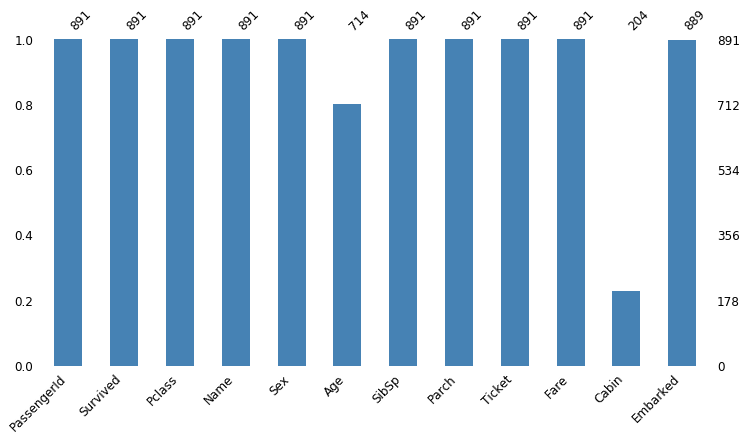

In [0]:
import missingno as msno
msno.bar(titanic_df, figsize=(12, 6), fontsize=12, color='steelblue')
plt.show()

<h2>Fixing the missing Age Column:</h2>

Let's visualize the age column with a histogram, to see the distribution of ages

In [0]:
x = titanic_df.Age.copy(deep=True)

In [0]:
x.dropna(axis=0, inplace=True)

len(x)

714

In [0]:
count, bin_edges = np.histogram(x, bins=10, range=(0,100))
print('count is',count,'\nBin edges are:',bin_edges)

count is [ 62 102 220 167  89  48  19   6   1   0] 
Bin edges are: [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


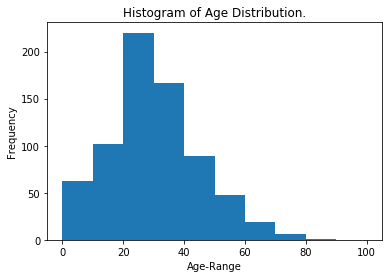

In [0]:
plt.hist(x, bins=bin_edges)
plt.title('Histogram of Age Distribution.')
plt.xlabel('Age-Range')
plt.ylabel('Frequency')
plt
plt.show()

Let's print out the measures of central tendency of the distribution

In [0]:
mode_age = (x.mode())[0]
mean_age = x.mean()
median_age = x.median()

print('Mean age is',mean_age)
print('Median age is',median_age)
print('Mode age is',mode_age)

Mean age is 29.69911764705882
Median age is 28.0
Mode age is 24.0


<font color='khaki'>We will now summarize the main features of the distribution of ages as it appears from the histogram:</font>

**Shape:** The distribution of ages is skewed right. This means we have a concentration of data of young people in The Titanic, <br>And a progressively fewer number of older people, making the histogram to skew to the right.<br>
It is also **unimodal** in shape, with just one dominant mode range of passenger ages between 20 - 30 years.

**Center:** The data seem to be centered around 28 years old. Note that this implies that roughly half the passengers in the Titanic  are less than 30 years old.<br>
This is also reflected by a mean, median and modal age of 30 years.

**Spread:** The data range is from about 0 to about 80, so the approximate range equals 80 - 0 = 80.

**Outliers:** There are no outliers in the Age data as all values seem evenly distributed, with a steady decrease of the number of passengers above the 30 - 40 age group.

<font color='khaki'>We can conclude that The Titanic had more passengers in the age range 0 to 30 years,<br>
And the most frequent age-range of all Titanic passengers was 20 - 30 years of age.</font>

finally we shall define a method that randomly replaces the missing age values with either the mean, median or mode values.

In [0]:
def rand_age(x):
    """ Takes a value x, and returns the float form of x.
    If x gives an error, then return either the mode, median or mean age"""    
    try:
        int(x)
        return float(x)
    except:
        i = [mean_age, mode_age, median_age]
        y = np.random.randint(0, len(i))
    
    return i[y]

Next, lets apply that method to the age column

In [0]:
titanic_df.Age = titanic_df.Age.apply(rand_age)


Let's confirm the changes

In [0]:
titanic_df.Age.isna().any()

False

<h2>Let's look at the 3 different classes of passengers:</h2> 

<font color='khaki'>First let's check the distribution of passengers in each class

In [0]:
# we need to be sure that there are only 3 classses (3, 2, 1) in the data set.
# let's use the unique method of pandas to verify

titanic_df.Pclass.unique()

array([3, 1, 2])

In [0]:
# next let's check the distribution size of each class of passengers
# we can easily do this with pandas groupby function.

# Let's group Pclasss by size and cast to a Data Frame.
classes = titanic_df.groupby('Pclass').size().to_frame()

# Let's rename the column
classes.rename(columns={0:'total'}, inplace=True)

# Let's customize the index
classes.index = ['1st Class','2nd Class','3rd Class']

# and display the result
classes

,total
1st Class,216
2nd Class,184
3rd Class,491


<font color='khaki'>We can see that out of `891 passengers` aboard the Titanic, `216` were in 1st Class, `184` in 2nd class and a whopping `491` in 3rd Class.</font>

<h3>Visualizing Passenger Distribution of The Titanic Using Bar and Pie plots.</h3>

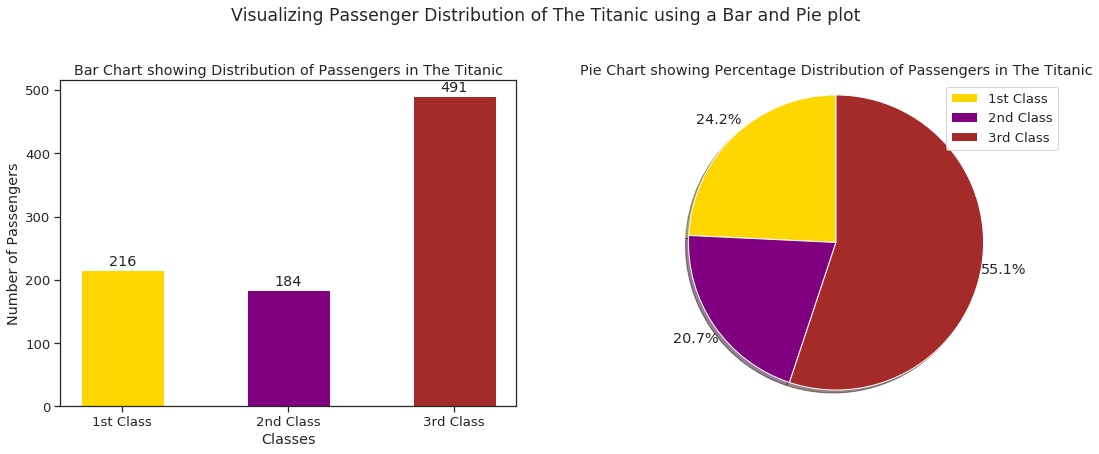

In [0]:
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
sns.set_style('ticks') # change background to white background
plt.suptitle('Visualizing Passenger Distribution of The Titanic using a Bar and Pie plot', y=1.05)

# For The Bar chart
plt.subplot(121)
color_list = ['gold','purple','brown']
plt.bar(x=classes.index, height=classes.total, data=classes, color= color_list, width=0.5)
plt.title('Bar Chart showing Distribution of Passengers in The Titanic')
plt.xlabel('Classes')
plt.ylabel('Number of Passengers')
for x,y in zip(classes.index, classes.total):
    label = round(y,2)  #  could also be written as:-   "{:.2f}".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='center',) # horizontal alignment can be left, right or center

# For The Pie chart
plt.subplot(122)
plt.pie(classes.total, 
        data=classes,
       autopct='%1.1f%%',
       colors=color_list,
       startangle=90,
       shadow=True,
       pctdistance=1.15)
plt.title('Pie Chart showing Percentage Distribution of Passengers in The Titanic')
plt.axis('equal')
plt.legend(labels=classes.index, loc='upper right')

plt.show()

<h2>Average Ticket Fares to The Titanic Per Passenger Class </h2>

<font color='khaki'>The above plots represent the norm in most human activities, regular tickets often sell more than VIP tickets.<br>
Let's find out the average  and max ticket fares for 1st Class, 2nd Class and 3rd Class passengers</font>

In [0]:
# first we form two groups of average and max ticket fares per class
ave_ticket_per_class = titanic_df[['Pclass','Fare']].groupby('Pclass').mean()
max_ticket_per_class = titanic_df[['Pclass','Fare']].groupby('Pclass').max()

# Next we group them together 
ave_ticket_per_class['Max_Fare'] = max_ticket_per_class['Fare']
ave_ticket_per_class.rename(columns={'Fare':'Ave_Fare'},inplace=True)

# Finally rename it
ticket_range = ave_ticket_per_class

# And display 
#ticket_range.sort_values(['Pclass'],ascending=True, inplace=True)
ticket_range

ticket_range.sort_index(ascending=False, inplace=True)
ticket_range  = ticket_range.transpose()
ticket_range

Pclass,3,2,1
Ave_Fare,13.67555,20.662183,84.154687
Max_Fare,69.55000,73.500000,512.329200


<font color='khaki'>With the average price of a 3rd class ticket going for about 14 pounds and that of a 1st class ticket going for 84 pounds on average;<br>
It can be inferred that ticket price could be one of the reasons why more than half the passengers aboard the Titanic were in 3rd class.<br>
Notice that the price difference between 3rd and 2nd Class tickets is minimal<br>
  

<h3>Visualizing average to max range of Ticket Fares per Passenger Class of The Titanic Using a Box Plot.</h3>

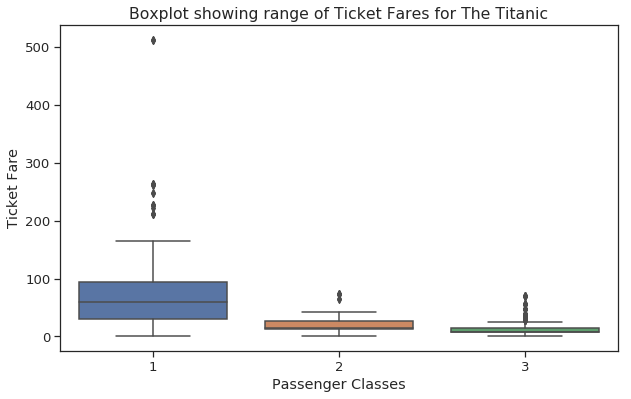

In [0]:
plt.figure(figsize=(10,6))
sns.boxplot('Pclass','Fare', data=titanic_df)
sns.set(font_scale=1.3)
plt.title('Boxplot showing range of Ticket Fares for The Titanic')
plt.xlabel('Passenger Classes')
plt.ylabel('Ticket Fare')
plt.show()

<font color='khaki'>Once again the boxplot shows striking similarities between the ticket fares for 3rd and 2nd class passengers of The Titanic</font>

<h2>Let's see the correlation between fares and passenger classes.</h2>

In [0]:
titanic_df['Pclass'].corr(titanic_df['Fare'])

-0.5494996199439074

<font color='khaki'>A correlation figure of -0.55 indicates an above average negative relationship between passenger classes and ticket fares.<br>
This could mean that as ticket fares tend to rise, the number of passengers tend to drop and vice-versa.<br>
 Note that correlation does not imply causation... <br>The fact that two variables seem to have a negative, positive or no relationship, does not imply that one variable causes the other to occur or not.<br>
 See Visualization below</font>

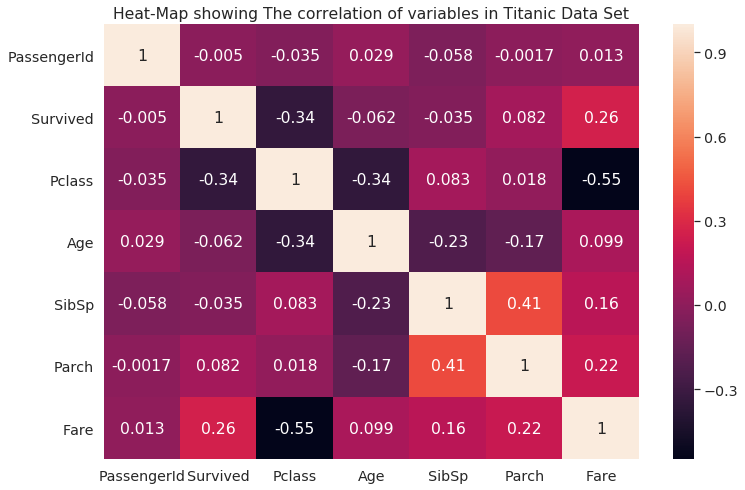

In [0]:
corr_data= titanic_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_data, annot=True)
plt.title('Heat-Map showing The correlation of variables in Titanic Data Set')

plt.show()

<h2>Let's look at the age distribution of passengers aboard The Titanic:</h2> 

<font color='khaki'>Earlier we saw that: <br>The average age of all passengers was about 30 years.<br>The minimum age was about 5 months (0.42 * 12).<br>The maximum was 80 years.</font>

**Let's check the minimum age again**

In [0]:
# First lets investigate the minimum age again

titanic_df.Age.min()

0.42

<font color='khaki'>It's possible that there were babies just a few months old aboard the Titanic.<br>This could be the reason why we have some age less than one year old,<br>Let's look at the distribution of passengers below one year old.</font>

In [0]:
titanic_df[(titanic_df.Age<1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


<font color='khaki'>We can see 7 passengers below one year old. Made up of 5 little boys and 2 pretty little girls.<br>And from their titles (`Master` or `Miss`), we can safely assume they were indeed just a few months old when the Titanic crashed.<br>On a positive note, it is good that all these infants survived as their `Survived` status is 1.</font>

<font color='khaki'>The details of the youngest passenger aboard The Titanic </font>

In [0]:
titanic_df[np.logical_and(titanic_df.Name, titanic_df.Age==titanic_df.Age.min())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


<font color='khaki'>The details of the oldest passenger aboard The Titanic </font>

In [0]:
titanic_df[np.logical_and(titanic_df.Name, titanic_df.Age==titanic_df.Age.max())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


The Wealthiest passenger

John Jacob Astor IV.

<h2> Did you know?</h2>

<img src='https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/length-titanic-1523649350.jpg?crop=1xw:1xh;center,top&resize=980:*'>


<h4><font color='khaki'>The Titanic was over 882 feet long (almost 3 football fields)... And it weighed 52,310 tons</font></h4>

courtesy [goodhousekeeping](https://www.goodhousekeeping.com/life/g19809308/titanic-facts/?slide=3)

<font color='khaki'>So we have 177 NaN values. Add that to 714 and total is 891 entries as expected.<br>
When it comes to dealing with NaN values, we usually have the following options:-<br>
1. We can leave it the way it is, if this option would not affect our computational or visual analysis<br>
2. We can replace NaN values with either the mean or mode of the distribution<br>
3. We can delete NaN values from the Data set, this would mean reducing the Data size and is best suited for large data sets with a few NaN values.</font> 

**Let's see the Class and Sex summary of passengers with NaN Age values.**

<font color ='khaki'>There is no given pattern, but clearly more passengers in 3rd class do not have their age values.<br>First class has 30 entries and 2nd class about a dozen entries.</font>

**Let's replace all NaN Age values with the average age of passengers in the Data set**



<h2>Visualizing Age Distribution of Passengers using a Hist and Dist Plot</h2>

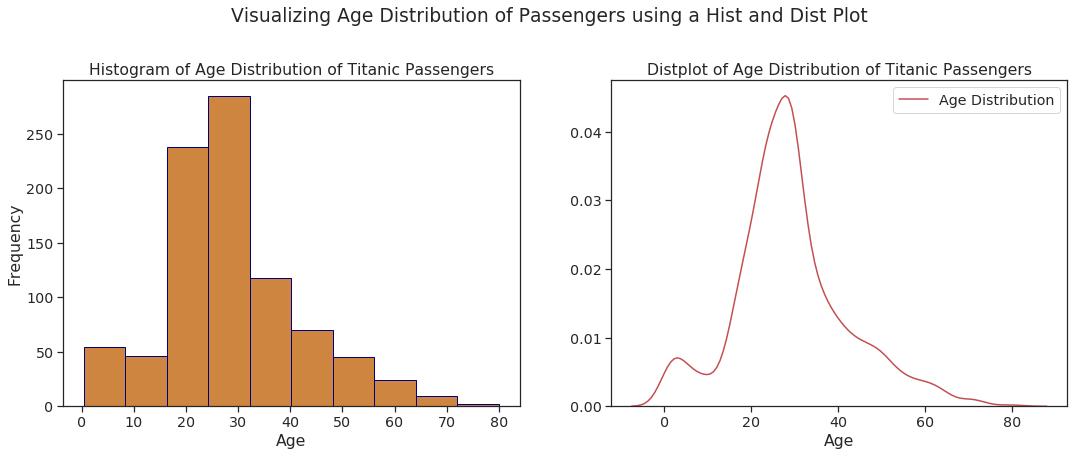

In [0]:
fig = plt.figure(figsize=(18, 6))
sns.set_style('ticks')

ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

plt.suptitle('Visualizing Age Distribution of Passengers using a Hist and Dist Plot', y=1.05)
#Histogram
titanic_df.Age.plot(kind='hist', edgecolor='navy', ax=ax0, facecolor='peru')
ax0.set_title('Histogram of Age Distribution of Titanic Passengers')
ax0.set_xlabel('Age')


#Distplot
sns.distplot(titanic_df.Age, hist=False, color='r', ax=ax1, label='Age Distribution')
ax1.set_title('Distplot of Age Distribution of Titanic Passengers')




plt.show()

<font color='khaki'>We will now summarize the main features of the distribution of ages as it appears from the histogram:</font>

**Shape:** The distribution of ages is skewed right. This means we have a concentration of data of young people in The Titanic, <br>And a progressively fewer number of older people, making the histogram to skew to the right.<br>
It is also **unimodal** in shape, with just one dominant mode range of passenger ages between 20 - 30 years.

**Center:** The data seem to be centered around 30 years old. Note that this implies that roughly half the passengers in the Titanic  are less than 30 years old.<br>
This is also reflected by a mean, median and modal age of 30 years.

**Spread:** The data range is from about 0 to about 80, so the approximate range equals 80 - 0 = 80.

**Outliers:** There are no outliers in the Age data as all values seem evenly distributed, with a steady decrease of the number of passengers above the 30 - 40 age group.

<font color='khaki'>We can conclude that The Titanic had more passengers in the age range 0 to 30 years,<br>
And the most frequent age-range of all Titanic passengers was 20 - 30 years of age.</font>

In [0]:
# further proof of the above assertion can be seen below
# Titanic had 586 passengers below age 30 and 305 passengers above 30 years.

titanic_df.groupby(titanic_df['Age'] <= 30).size()

Age
False    305
True     586
dtype: int64

<font color='khaki'>Code above shows that out of the `891` passengers, `586` `(66%)` were less than 30 years old and `305` `(34%)` were 30 years and above.</font> 

<h2>Let's compare the age distribution of Males and Females aboard The Titanic</h2>

<font color='khaki'>First Let's create two separate Data Frames for Males and Females.</font>

In [0]:
males = titanic_df[titanic_df.Sex=='male']
females = titanic_df[titanic_df.Sex=='female']

<font color='khaki'>Let's see the summary statistics for males and females...

In [0]:
males.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,454.147314,0.188908,2.389948,29.978041,0.429809,0.235702,25.523893
std,257.486139,0.391775,0.813580,13.130904,1.061811,0.612294,43.138263
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,23.000000,0.000000,0.000000,7.895800
50%,464.000000,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,680.000000,0.000000,3.000000,35.000000,0.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [0]:
females.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,431.028662,0.742038,2.159236,27.787216,0.694268,0.649682,44.479818
std,256.846324,0.438211,0.857290,12.900064,1.156520,1.022846,57.997698
min,2.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,231.750000,0.000000,1.000000,21.000000,0.000000,0.000000,12.071875
50%,414.500000,1.000000,2.000000,28.000000,0.000000,0.000000,23.000000
75%,641.250000,1.000000,3.000000,35.000000,1.000000,1.000000,55.000000
max,889.000000,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


<h3>Summary Statistics</h3>

<font color='khaki'>From the summary above, we can see that:-<br>
  1. There were 577 males and 314 female passengers on The Titanic.<br>
  2. The average age for males was about 30 and about 28 for women.<br>
  3. Interestingly women paid 45 pounds for a ticket, while men paid 26 pounds on average... <br>We would investigate why, but I'm thinking the difference may be as a result of more women in 1st class and 2nd class than men.<br>Or a greater proportion of women in 1st and 2nd class seats than men<br>
4. The maximum age for women was 63 and max age for men was 80 years.</font>

<h2>Visualizing Age-Group Distribution of Male and Female Passengers using a Horizontal Bar Plot</h2>

In [0]:
age_range = ['[0.0 - 10]','[10 - 20]','[20 - 30]','[30 - 40]','[40 - 50]','[50 - 60]','[60 - 70]','[70 - 80]']
age_dict = {}

In [0]:
def age_grades(dataframe):
    start = 0
  
    for i in age_range:
        stop = start + 10
        x = dataframe[np.logical_and(dataframe.Age>start, dataframe.Age<=stop)].shape[0]
        age_dict[i] = [x]
        start += 10
    return age_dict

males_dict = age_grades(males)
males_df = pd.DataFrame(males_dict)
males_df = males_df.transpose()

In [0]:
females_dict = age_grades(females)
females_df = pd.DataFrame(females_dict)
females_df = females_df.transpose()


In [0]:
maleFemaleAgeRange = pd.concat([males_df, females_df], axis=1)
maleFemaleAgeRange.columns = ['Male_Age_Range', 'Female_Age_Range']

In [0]:
maleFemaleAgeRange

,Male_Age_Range,Female_Age_Range
[0.0 - 10],33,31
[10 - 20],69,46
[20 - 30],273,134
[30 - 40],100,55
[40 - 50],55,31
[50 - 60],28,14
[60 - 70],14,3
[70 - 80],5,0


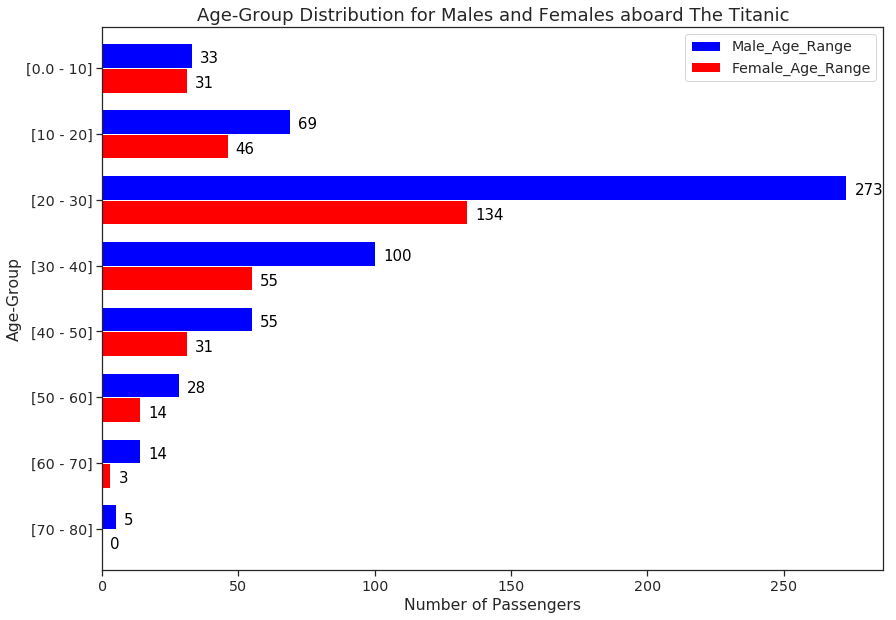

In [0]:
sns.set_style('ticks')
ax = maleFemaleAgeRange.plot(kind='barh', color=['blue','red'], figsize=(14,10), width=0.75)
sns.set(font_scale=1.5)
ax.set_title('Age-Group Distribution for Males and Females aboard The Titanic')
ax.set_xlabel('Number of Passengers')
ax.set_ylabel('Age-Group')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+3, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15, color='black')

# invert to set y-axis in ascending order
ax.invert_yaxis()

plt.show()

<font color='khaki'>From the Horizontal Bar plot above, we can easily see that:-<br>
  1. The `20 - 30` age group has the highest concentration of passengers.<br>
  273 males and 134 females with a total count of 407 passengers.</font><br>
  ```
  (407 divided by 891) * 100 = 46% of passengers.
  ```<br>
  <font color='khaki'>2. The next most populous age-group is the `30 - 40` group consisting of a total of 155 passengers.</font>

<h2>Okay, lets look at The distribution of males and females in the three passenger classes.</h2><br><font color='khaki'>Recall that the average price of female tickets was about 45 pounds which was about 75% more expensive than the average male passenger ticket of 26 pounds.</br>One possible reason could be that there were more female passengers in the higher classes(1st class, 2nd class) than male passengers.<br>Or that the percentage of females to the population of females (proportion) is higher than the proportion of males in the higher classes of passengers.<br> Let's see to that.</h2></font>

**Let's define a Data frame for the number of men and women per class**

In [0]:
sex_per_class = titanic_df.groupby(['Pclass','Sex']).size().to_frame()
sex_per_class.reset_index(inplace=True)
sex_per_class

,Pclass,Sex,0
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


**Next let's define a simple method that calculates the total proportion of males and females per class**

In [0]:
total_f = len(titanic_df[titanic_df.Sex=='female'])
total_m = len(titanic_df[titanic_df.Sex=='male'])


def pct_(series):
    """Takes a series of numeric values and converts each value 
    to a percent based on its index.
    Returns a list of converted values to pct,
    For total males and females of the Titanic."""
    x = list(series)
    for i in range(len(x)):
        if i % 2 == 0:
            x[i] = round((x[i] / total_f)*100)
        else:
            x[i] = round((x[i] / total_m)*100)
    return x

**Next let's append that proportion as a column to the sex_per_class data frame and rename the 0 column to 'Count'.**

In [0]:
sex_per_class['Pct_of_total(M/F)_per_class'] = pct_(sex_per_class[0])
sex_per_class.rename(columns={0:'Count'}, inplace=True)

**Finally we can view it**

In [0]:
sex_per_class

,Pclass,Sex,Count,Pct_of_total(M/F)_per_class
0,1,female,94,30
1,1,male,122,21
2,2,female,76,24
3,2,male,108,19
4,3,female,144,46
5,3,male,347,60


<font color='khaki'>We can clearly see the following:<br>
1. The count of males in each passenger class is higher than the count of females.<br>
2. But the proportion of females in the higher classes(1st, 2nd) is more than the proportion of males.<br>
3. We can see that the proprtion of females to males in 1st class is 30% against 21%,<br>
    And 24% against 19% in 2nd class... While on the flip side the males have 60% of their population in 3rd class against 46% for the females.<br>
4. This accounts for why female tickets on average cost more than male tickets, because the percentage of females in higher classes is more than males, and as a result the average ticket fare for females is 45 pounds, against 26 pounds for males.

<h2>Visualizing The proportions of male and female passengers per class, using Waffle Charts</h2>

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


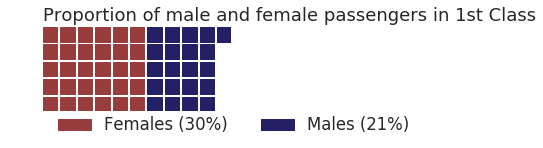

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


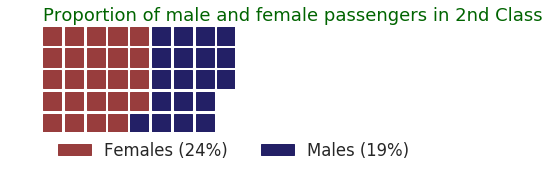

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


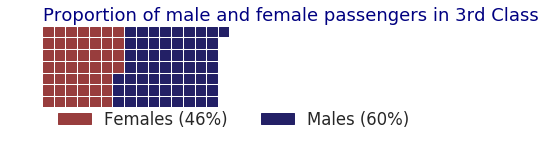

In [0]:
sns.set(font_scale=1.5)
sns.set_style('ticks')


first_class = {'Females': 30, 'Males': 21}
second_class = {'Females': 24, 'Males': 19}
third_class = {'Females': 46, 'Males': 60}

plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=first_class, 
    colors=("#983D3D", "#232066"),
    title={'label': 'Proportion of male and female passengers in 1st Class', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in first_class.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.45), 'ncol': len(first_class), 'framealpha': 0},
    plot_direction='NW',
)

plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=second_class, 
    colors=("#983D3D", "#232066"),
    title={'label': 'Proportion of male and female passengers in 2nd Class', 'loc': 'left', 'color':'darkgreen'},
    labels=["{0} ({1}%)".format(k, v) for k, v in second_class.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(second_class), 'framealpha': 0},
    plot_direction='NW',
)

plt.figure(
    FigureClass=Waffle, 
    rows=7, 
    values=third_class, 
    colors=("#983D3D", "#232066"),
    title={'label': 'Proportion of male and female passengers in 3rd Class', 'loc': 'left', 'color':'navy'},
    labels=["{0} ({1}%)".format(k, v) for k, v in third_class.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.45), 'ncol': len(third_class), 'framealpha': 0},
    plot_direction='NW',
)

fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()


<font color='brown'>**next,  let's view who bought the most xpensive tickets, survival data per class, survival data per sex, word cloud in tribute to those who died in 1st , 2nd or 3rd classes. use of lambda expressions, map of the location where titanic crashed. **
    
    
    [titanic_crash_site](http://www.shipwreckworld.com/maps/rms-titanic)

In [0]:
# we select the 3rd class passengers in a group using pandas.
third_class_group = titanic_df['Pclass'] == 3

# then we assign that selection to the slice of titanic_df
third_class_df = titanic_df[third_class_group]

# we view the first 5 entries of the 3rd class passengers data frame.
third_class_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S


In [0]:
third_class_df.shape

(491, 12)

In [0]:
# Do a word cloud in tribute to those in third class with their names. 